## Iskanje strukture v podatkih

Podatkovno rudarjenje, naloga, `<13.04.2025>`  
**`<Žan Petkovšek>`**

Z modeliranjem skušamo poiskati strukturo v podatkih. Z metodami nenadzorovanga modeliranja skušamo poiskati skupine podobnih podatkov oz. skupine primerov.

V nalogi boste uporabili modeliranje verjetnostnih porazdelitev za iskanje osamelcev ter metode za iskanje skupin podobnih primerov (gručenje).

### Podatki

Opis podatkovne zbirke MovieLens ostaja enak prvi nalogi.

### Vprašanja

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne toliko implementacija vaše rešitve.

#### 1. Iskanje osamelcev (50%) 
O ocenah katerih filmov so si uporabniki najmanj enotni? Povedano drugače, za katere filme so pripadajoče ocene najbolj razpršene?

Formuliraj problem kot modeliranje verjetnostne porazdelitve. Premisli o naslednjih vprašanjih, naredi ustrezne poizkuse in odgovori.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Branje podatkov
ratings = pd.read_csv("./podatki/ml-latest-small/ratings.csv")
movies = pd.read_csv("./podatki/ml-latest-small/movies.csv")

# Združimo ocene s filmi, da dobimo naslove
ratings_with_titles = ratings.merge(movies, on='movieId')

# Skupinsko združimo po naslovu filma
rating_stats = ratings_with_titles.groupby('title').agg(
    count=('rating', 'count'),
    std=('rating', 'std'),
    mean=('rating', 'mean')
).reset_index()

# Uporabimo prag, npr. vsaj 30 ocen
filtered_stats = rating_stats[rating_stats['count'] >= 30]

# Sortiraj po standardnem odklonu (std)
most_controversial = filtered_stats.sort_values(by='std', ascending=False)

# Prikaži top 10 filmov z največjo razpršenostjo ocen
print(most_controversial[['title', 'count', 'mean', 'std']].head(10))

                                                  title  count      mean  \
6893                                         Saw (2004)     33  3.272727   
4926                          Mad Max: Fury Road (2015)     31  3.790323   
1035                    Blair Witch Project, The (1999)     86  2.738372   
6911                                 Scary Movie (2000)     37  2.581081   
7143                                   Showgirls (1995)     35  2.314286   
4757  Lives of Others, The (Das leben der Anderen) (...     37  3.932432   
8518                                 Vanilla Sky (2001)     37  3.013514   
7486  Star Wars: Episode II - Attack of the Clones (...     82  3.103659   
972                                Billy Madison (1995)     42  3.023810   
7379                                   Space Jam (1996)     50  2.680000   

           std  
6893  1.381184  
4926  1.364882  
1035  1.318927  
6911  1.309758  
7143  1.278129  
4757  1.264703  
8518  1.260988  
7486  1.258889  
972   1.25

#### 1.1. vprašanje:

Katera je ustrezna naključna spremenljivka (količina) v podatkih, ki odgovarja na vprašanje?        

In [ ]:
# Primer: prikaz ocen za določen film
primer_film = "Fight Club (1999)"
ocena_film = ratings_with_titles[ratings_with_titles['title'] == primer_film]['rating']

# Lahko še izračunaš povprečje in standardni odklon (kot lastnosti naključne spremenljivke X_F)
print("Povprečje:", ocena_film.mean())
print("Standardni odklon:", ocena_film.std())

Povprečje: 4.178217821782178
Standardni odklon: 0.8741283032976781


**Odgovor:**

Za vsak film $F$ si lahko zamislimo naključno spremenljivko $X_F$, ki predstavlja ocene uporabnikov tega filma.

Uporabniki se ne strinjajo, kadar ima $X_F$ veliko varianco ali standardni odklon – torej je porazdelitev ocen široka.

Ustrezna naključna spremenljivka je: *ocena posameznega uporabnika za določen film*.

#### 1.2. vprašanje:
Nariši njeno porazdelitev, npr., s pomočjo histograma.

Povprečje ocen za 'Fight Club (1999)': 4.178217821782178
Standardni odklon ocen za 'Fight Club (1999)': 0.8741283032976781


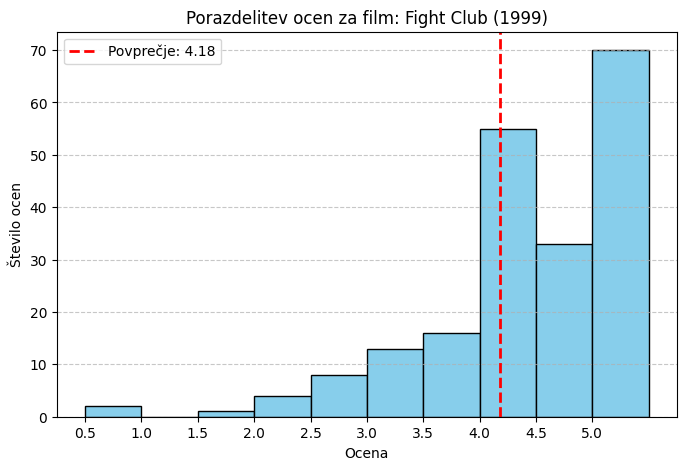

In [ ]:
# Pravi naslov iz podatkov
film_naslov = "Fight Club (1999)"

# Filtriramo ocene za ta film
ocena_film = ratings_with_titles[ratings_with_titles['title'] == film_naslov]['rating']

# Izračunamo povprečje in standardni odklon
povprecje = ocena_film.mean()
std_odklon = ocena_film.std()

print(f"Povprečje ocen za '{film_naslov}':", povprecje)
print(f"Standardni odklon ocen za '{film_naslov}':", std_odklon)

# Narišemo histogram
plt.figure(figsize=(8, 5))
plt.hist(ocena_film, bins=np.arange(0.5, 5.6, 0.5), edgecolor='black', color='skyblue')

# Dodamo črto na povprečje
plt.axvline(povprecje, color='red', linestyle='dashed', linewidth=2, label=f'Povprečje: {povprecje:.2f}')

# Dodamo naslove in oznake
plt.title(f"Porazdelitev ocen za film: {film_naslov}")
plt.xlabel("Ocena")
plt.ylabel("Število ocen")
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Odgovor:** 

Povprečje: 
- Povprečna ocena filma – kako so uporabniki ocenili film v povprečju. 

Standardni odklon: 
- Koliko so ocene razpršene okoli povprečja. 

Visok standardni odklon pomeni, da so ocene bolj razpršene, nizka vrednost pa pomeni, da se ocene večinoma gibljejo okoli povprečja.

#### 1.3. vprašanje:

Ali porazdelitev spominja na kakšno znano porazdelitev? Ali je porazdelitev morda normalna ali katera druga? 

In [ ]:
from scipy.stats import anderson

# Izvedemo Anderson-Darling test
result = anderson(ocena_film)

print(f"Anderson-Darling test: stat = {result.statistic:.4f}")
for i in range(len(result.significance_level)):
    print(f"P-vrednost za {result.significance_level[i]}%: {result.critical_values[i]:.4f}")

# Preverimo, če je test za 5% nivo pomembnosti pokazal, da porazdelitev ni normalna
if result.statistic > result.critical_values[2]:  # 5% nivo pomembnosti
    print("Porazdelitev ni normalna.")
else:
    print("Porazdelitev je normalna.")

Anderson-Darling test: stat = 9.8178
P-vrednost za 15.0%: 0.5650
P-vrednost za 10.0%: 0.6440
P-vrednost za 5.0%: 0.7720
P-vrednost za 2.5%: 0.9010
P-vrednost za 1.0%: 1.0710
Porazdelitev ni normalna.


**Odgovor:**

Za preverjanje, ali porazdelitev ocen za film Fight Club (1999) sledi normalni porazdelitvi, sem uporabil Anderson-Darlingov test normalnosti. Rezultat testa je bil:

- statistika testa: 9.8178

- kritična vrednost za 5 % nivo pomembnosti: 0.7720

Ker je vrednost statistike bistveno večja od kritične vrednosti, lahko z visoko gotovostjo zavrnemo ničelno hipotezo, da porazdelitev ocen sledi normalni porazdelitvi. To pomeni, da je porazdelitev statistično značilno različna od normalne.

Poleg tega lahko vizualno vidimo za ni zvonaste oblike.

Minimum ocene: 0.0, Maximum ocene: 1.0
Povprečje: 0.8173817381738172, Standardni odklon: 0.1937693188673619


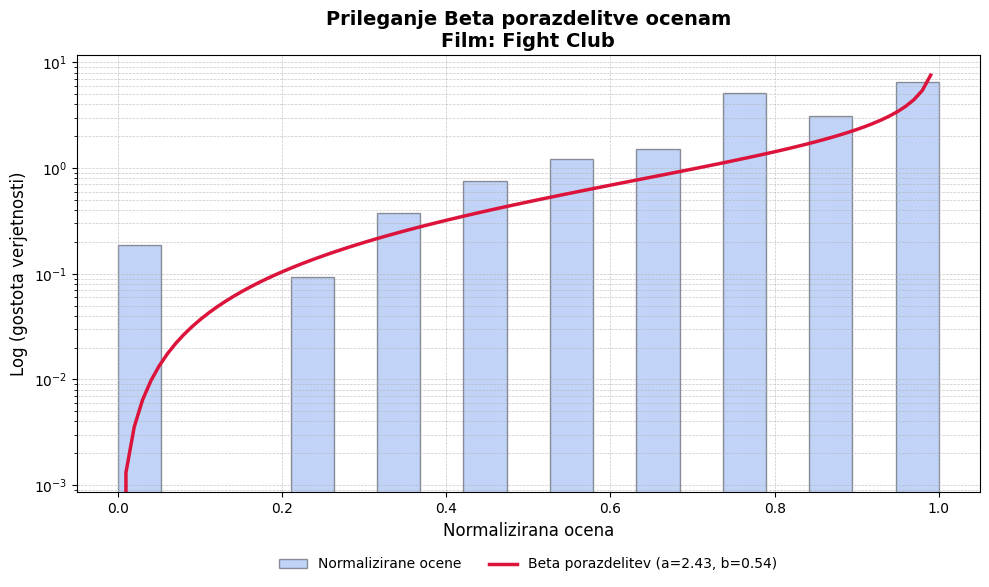

In [ ]:
from scipy.stats import beta

# --- Priprava podatkov ---
film_id = movies[movies['title'].str.contains("Fight Club", case=False)]['movieId'].values[0]
ocena_film = ratings[ratings['movieId'] == film_id]['rating'].dropna()

# Normalizacija ocen
ocena_norm = (ocena_film - 0.5) / (5.0 - 0.5)
ocena_norm = ocena_norm.clip(0, 1)  # Za varnost

# Preveri, če so podatki v pričakovanem obsegu
print(f"Minimum ocene: {ocena_norm.min()}, Maximum ocene: {ocena_norm.max()}")

# Preverjanje povprečja in standardnega odklona
mean = np.mean(ocena_norm)
std = np.std(ocena_norm)
print(f"Povprečje: {mean}, Standardni odklon: {std}")

# --- Ročna nastavitev parametrov Beta porazdelitve ---
a = (mean * (mean * (1 - mean) / std**2 - 1))
b = (1 - mean) * (mean * (1 - mean) / std**2 - 1)

# --- Vizualizacija ---
x = np.linspace(0, 1, 100)
pdf = beta.pdf(x, a, b)

plt.figure(figsize=(10, 6))
plt.hist(ocena_norm, bins=np.linspace(0, 1, 20), density=True,
         alpha=0.4, color='cornflowerblue', edgecolor='black', label="Normalizirane ocene")
plt.plot(x, pdf, color='crimson', lw=2.5, label=f"Beta porazdelitev (a={a:.2f}, b={b:.2f})")

# Osi in naslovi
plt.yscale('log')
plt.title("Prileganje Beta porazdelitve ocenam\nFilm: Fight Club", fontsize=14, weight='bold')
plt.xlabel("Normalizirana ocena", fontsize=12)
plt.ylabel("Log (gostota verjetnosti)", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, fontsize=10, frameon=False)
plt.tight_layout()
plt.show()

**Odgovor:**

Na prvi pogled Beta funkcija še najbolje opiše našo porazdelitev, kaseneje bomo videli da to ni točna rešitev!

#### 1.4. vprašanje:

Oceni parametre te porazdelitve s pomočjo postopkov, ki smo jih spoznali na vajah.  Izmed porazdelitev, ki smo jih spoznali na vajah, izberi tisto, ki se podatkom najbolj prilega.        

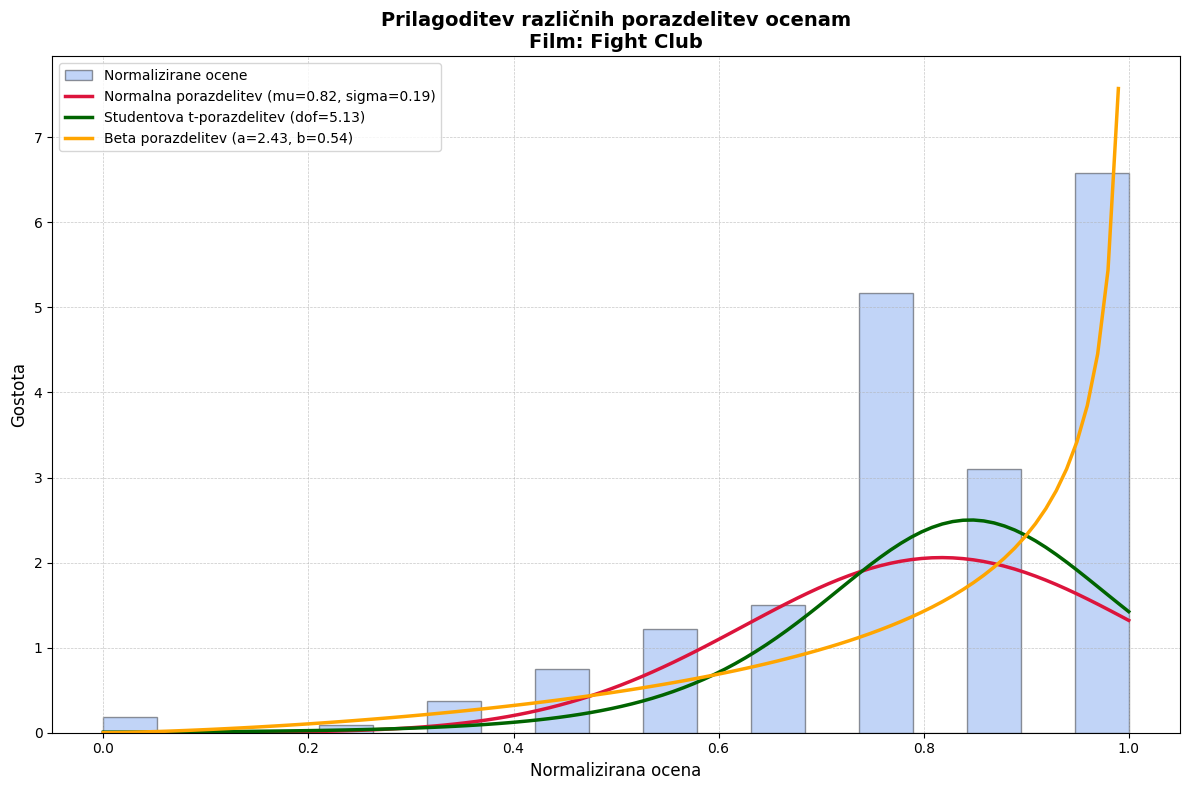

K-S test za Normalno porazdelitev: Statistika = 0.2012, P-vrednost = 0.0000
K-S test za Studentovo t-porazdelitev: Statistika = 0.1772, P-vrednost = 0.0000
K-S test za Beta porazdelitev: Statistika = 0.3465, P-vrednost = 0.0000


In [ ]:
from scipy.stats import norm, t
# Preverimo koncentracijo podatkov
ocena_film = ratings[ratings['movieId'] == film_id]['rating'].dropna()

# Normalizacija ocen
ocena_norm = (ocena_film - 0.5) / (5.0 - 0.5)
ocena_norm = ocena_norm.clip(0, 1)

# Parametri za normalno porazdelitev
mu, sigma = norm.fit(ocena_norm)

# Parametri za Studentovo t-porazdelitev
dof, loc_t, scale_t = t.fit(ocena_norm)

# Parametri za Beta porazdelitev
mean = np.mean(ocena_norm)
std = np.std(ocena_norm)
a = mean * ((mean * (1 - mean) / std**2) - 1)
b = (1 - mean) * ((mean * (1 - mean) / std**2) - 1)

# Naredimo stolpični diagram
plt.figure(figsize=(12, 8))

# Stolpci (histogram) za normalizirane ocene
plt.hist(ocena_norm, bins=np.linspace(0, 1, 20), density=True, alpha=0.4, color='cornflowerblue', edgecolor='black', label="Normalizirane ocene")

# Verjetnostna gostota za normalno porazdelitev
x = np.linspace(0, 1, 100)
pdf_norm = norm.pdf(x, mu, sigma)
plt.plot(x, pdf_norm, color='crimson', lw=2.5, label=f"Normalna porazdelitev (mu={mu:.2f}, sigma={sigma:.2f})")

# Verjetnostna gostota za Studentovo t-porazdelitev
pdf_t = t.pdf(x, dof, loc_t, scale_t)
plt.plot(x, pdf_t, color='darkgreen', lw=2.5, label=f"Studentova t-porazdelitev (dof={dof:.2f})")

# Verjetnostna gostota za Beta porazdelitev
pdf_beta = beta.pdf(x, a, b)
plt.plot(x, pdf_beta, color='orange', lw=2.5, label=f"Beta porazdelitev (a={a:.2f}, b={b:.2f})")

# Nastavitve za graf
plt.title("Prilagoditev različnih porazdelitev ocenam\nFilm: Fight Club", fontsize=14, weight='bold')
plt.xlabel("Normalizirana ocena", fontsize=12)
plt.ylabel("Gostota", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

from scipy.stats import kstest

# K-S test za Normalno porazdelitev
ks_stat, ks_p_val_norm = kstest(ocena_norm, 'norm', args=(mu, sigma))
print(f"K-S test za Normalno porazdelitev: Statistika = {ks_stat:.4f}, P-vrednost = {ks_p_val_norm:.4f}")

# K-S test za Studentovo t-porazdelitev
ks_stat_t, ks_p_val_t = kstest(ocena_norm, 't', args=(dof, loc_t, scale_t))
print(f"K-S test za Studentovo t-porazdelitev: Statistika = {ks_stat_t:.4f}, P-vrednost = {ks_p_val_t:.4f}")

# K-S test za Beta porazdelitev
ks_stat_beta, ks_p_val_beta = kstest(ocena_norm, 'beta', args=(a, b))
print(f"K-S test za Beta porazdelitev: Statistika = {ks_stat_beta:.4f}, P-vrednost = {ks_p_val_beta:.4f}")

**Odgovor:**

P-vrednost: P-vrednost manjša od 0.05 pomeni, da zavrnemo ničelno hipotezo, ki pravi, da podatki izvirajo iz določene porazdelitve. Vse tri porazdelitve imajo p-vrednost 0.0000, kar pomeni, da nobena od teh porazdelitev ne ustreza popolnoma podatkom.

Statistika: Statistika testiranja (določena s K-S testom) prikazuje razliko med empirično porazdelitvijo in teoretično porazdelitvijo. Večja kot je statistika, večja je razlika med temi porazdelitvami.

Zaključek:
Kljub temu, da so p-vrednosti zelo nizke (kar nakazuje na zavrnitev nobene izmed porazdelitev), lahko še vedno vidimo, da različne porazdelitve (Normalna, t in Beta) vse bolj ali manj napovedujejo podatke, vendar nobena ni popolnoma primerna.

#### 1.5. vprašanje:

Izpiši filme z vrednostjo naključne spremenljivke, ki spada v zgornjih 5% statistično značilnih primerov. 

In [ ]:
# K-S test za vse filme in shranjevanje K-S statistike in p-vrednosti
ks_results = []

for movie_id in movies['movieId']:
    # Ocene za film
    ocena_film = ratings[ratings['movieId'] == movie_id]['rating'].dropna()

    # Če film nima dovolj ocen (manj kot 20 ocen), ga preskočimo
    if len(ocena_film) < 20:
        continue

    # Preverimo, če so ocene "skoraj enake" (npr. vse iste ali zelo blizu)
    if np.std(ocena_film) < 0.01:
        continue

    # Normalizacija ocen
    ocena_norm = (ocena_film - 0.5) / (5.0 - 0.5)
    ocena_norm = ocena_norm.clip(0, 1)

    # Preverimo, ali so v podatkih NaN ali neskončne vrednosti
    if np.any(np.isnan(ocena_norm)) or np.any(np.isinf(ocena_norm)):
        print(f"Film {movie_id} vsebuje NaN ali neskončne vrednosti, zato ga preskočimo.")
        continue

    # Parametri za normalno porazdelitev
    mu, sigma = norm.fit(ocena_norm)
    
    # K-S test za Normalno porazdelitev
    try:
        ks_stat, ks_p_val_norm = kstest(ocena_norm, 'norm', args=(mu, sigma))
    except Exception as e:
        print(f"Napaka pri izvajanju K-S testa za film {movie_id}: {e}")
        continue

    # Izračunamo p-vrednost kot površino pod krivuljo
    p_value = norm.cdf(ks_stat, loc=mu, scale=sigma)
    
    # Shranimo rezultate
    ks_results.append((movie_id, ks_stat, p_value))

# Pretvorimo rezultate v DataFrame za lažjo obdelavo
ks_df = pd.DataFrame(ks_results, columns=['movieId', 'ks_stat', 'p_value'])

# Preverimo, če so rezultati prazni
if ks_df.empty:
    print("Ni filmov z zadostnim številom ocen za izvedbo K-S testa.")
else:
    # Uvrstimo filme po p-vrednosti (po padajočem vrstnem redu)
    ks_df_sorted = ks_df.sort_values(by='p_value', ascending=True)

    # Izberemo zgornjih 5%
    top_5_percent = ks_df_sorted.head(int(len(ks_df_sorted) * 0.05))

    # Pridobimo naslove filmov za zgornjih 5%
    top_5_movies = movies[movies['movieId'].isin(top_5_percent['movieId'])]

    # Združimo naslove filmov z njihovimi K-S statističnimi podatki, vključno z 'p_value'
    top_5_movies_with_ks = top_5_movies.merge(ks_df_sorted[['movieId', 'ks_stat', 'p_value']], on='movieId')

    # Sortiramo po K-S statistiki
    top_5_movies_with_ks_sorted = top_5_movies_with_ks.sort_values(by='p_value', ascending=True)

    # Izpišemo zgornjih 5% filmov z K-S statistiko, pravilno sortirano po K-S statistiki
    print(top_5_movies_with_ks_sorted[['movieId', 'title', 'ks_stat', 'p_value']])

    movieId                                              title   ks_stat  \
55    69844      Harry Potter and the Half-Blood Prince (2009)  0.209608   
54    69481                            Hurt Locker, The (2008)  0.219354   
58    88125  Harry Potter and the Deathly Hallows: Part 2 (...  0.180271   
49    49530                               Blood Diamond (2006)  0.234275   
42     6787                     All the President's Men (1976)  0.195687   
..      ...                                                ...       ...   
19     1250               Bridge on the River Kwai, The (1957)  0.223252   
25     2243                              Broadcast News (1987)  0.198523   
3       318                   Shawshank Redemption, The (1994)  0.314332   
27     2599                                    Election (1999)  0.197176   
63   111759                            Edge of Tomorrow (2014)  0.186157   

         p_value  
55  9.374510e-08  
54  1.080104e-07  
58  5.363646e-07  
49  5.91084

**Odgovor:** 

Koda izvaja Kolmogorov-Smirnov test (K-S test) za analizo filmov na podlagi ocen, da bi preverila, kako se te ocene ujemajo z normalno porazdelitvijo. Na koncu izpišemo zgornjih 5% filmov, ki imajo najvišje K-S statistike, kar pomeni, da so ti filmi najbolj nenavadni v primerjavi z normalno porazdelitvijo. 

Če si pogledamo prvi film in njegov graf vidimo da ima lepo zvonasto obliko.

Povprečje ocen za 'Harry Potter and the Half-Blood Prince (2009)': 4.068965517241379
Standardni odklon ocen za 'Harry Potter and the Half-Blood Prince (2009)': 0.5127680123435535


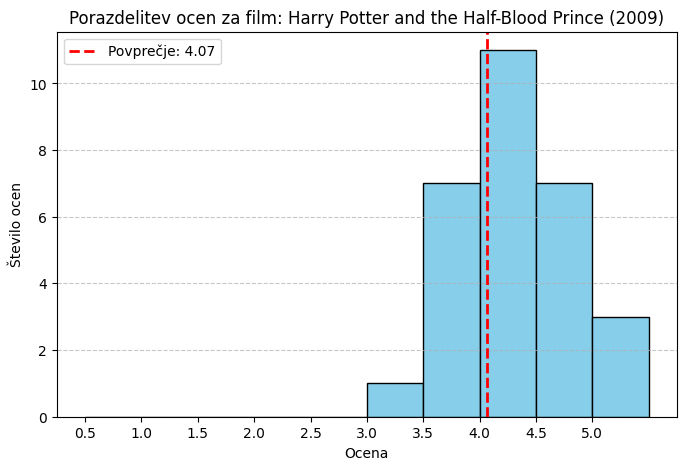

In [ ]:
# Pravi naslov iz podatkov
film_naslov = "Harry Potter and the Half-Blood Prince (2009)"

# Filtriramo ocene za ta film
ocena_film = ratings_with_titles[ratings_with_titles['title'] == film_naslov]['rating']

# Izračunamo povprečje in standardni odklon
povprecje = ocena_film.mean()
std_odklon = ocena_film.std()

print(f"Povprečje ocen za '{film_naslov}':", povprecje)
print(f"Standardni odklon ocen za '{film_naslov}':", std_odklon)

# Narišemo histogram
plt.figure(figsize=(8, 5))
plt.hist(ocena_film, bins=np.arange(0.5, 5.6, 0.5), edgecolor='black', color='skyblue')

# Dodamo črto na povprečje
plt.axvline(povprecje, color='red', linestyle='dashed', linewidth=2, label=f'Povprečje: {povprecje:.2f}')

# Dodamo naslove in oznake
plt.title(f"Porazdelitev ocen za film: {film_naslov}")
plt.xlabel("Ocena")
plt.ylabel("Število ocen")
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

#### 2. Gručenje filmov (50%)

Priporočilni sistemi pogosto odkrivajo skupine predmetov (v našem primeru filme), za katere velja visoka medsebojna podobnost.

Poiščite 100 najbolj gledanih filmov. Ali med njimi obstajajo skupine?
Uporabite ustrezen algoritem za gručenje. Na film lahko gledamo kot vektor, kjer je  
število komponent enako številu uporabnikov. 

Vektorji vsebujejo tudi *neznane vrednosti*.
Primer vektorjev za deset filmov prikazuje spodnja tabela.

Algoritme gručenja lahko izvajamo v izvornem prostoru (koordinatni sistem filmi-uporabniki) ali pa filme primerjamo z merami podobnosti, ki smo jih spoznali na vajah. 
Premisli, kateri način je primernejši glede na obliko podatkov.

| x          |Movie                                      | $u_0$ |$u_1$ | $u_2$ | $\cdots$ |
|------------|-------------------------------------------|:-----:|:----:|:------|:--------:|
|$\vec{x_0}$ | Fight Club (1999)                         | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_1}$ | Twelve Monkeys (a.k.a. 12 Monkeys) (1995) | ?     | ?    | 2.5   | $\cdots$ |
|$\vec{x_2}$ | Independence Day (a.k.a. ID4) (1996)      | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_3}$ | Dances with  Wolves (1990)                | 4.0   | ?    | ?     | $\cdots$ |
|$\vec{x_4}$ | Fargo (1996)                              | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_5}$ | Speed (1994)                              | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_6}$ | Apollo 13 (1995)                          | ?     | 2.0  | ?     | $\cdots$ |
|$\vec{x_7}$ | Seven (a.k.a. Se7en) (1995)               | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_8}$ | Sixth Sense, The (1999)                   | 3.0   | ?    | 4.0   | $\cdots$ |
|$\vec{x_9}$ | Aladdin (1992)                            | ?     | ?    | ?     | $\cdots$ |
|$\cdots$    | $\cdots$                                  | $\cdots$ | $\cdots$  | $\cdots$ | $\cdots$ |

Pri tem odgovori na naslednja vprašanja.

#### 2.1. vprašanje:

Utemelji izbiro algoritma in mere podobnosti.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer

# 1. Izberi 100 najbolj gledanih filmov
movie_counts = ratings.groupby('movieId').size()
top_100_movies = movie_counts.sort_values(ascending=False).head(100).index

# Podatki za 100 najbolj gledanih filmov
ratings_top_100 = ratings[ratings['movieId'].isin(top_100_movies)]

# 2. Ustvarimo matriko uporabnikov-filmov
user_movie_matrix = ratings_top_100.pivot(index='userId', columns='movieId', values='rating')

# 3. Nadomestimo manjkajoče vrednosti
imputer = SimpleImputer(strategy='mean')
user_movie_matrix_filled = pd.DataFrame(imputer.fit_transform(user_movie_matrix), columns=user_movie_matrix.columns)

# 4. Izračunaj podobnost med filmi (uporabimo kosinusno podobnost)
cosine_sim = cosine_similarity(user_movie_matrix_filled.T)

# 5. Gručenje s K-means (izberemo število skupin, npr. 5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(cosine_sim)

# 6. Dodamo oznake skupin filmom
movies_clustered = pd.DataFrame({'movieId': user_movie_matrix.columns, 'cluster': kmeans.labels_})

# 7. Pridobimo naslove filmov za združene skupine
# Globoka kopija top_100_movies_with_titles
top_100_movies_with_titles = movies[movies['movieId'].isin(movies_clustered['movieId'])]
top_100_movies_with_titles = top_100_movies_with_titles.copy()

# Zdaj varno dodeli vrednosti
top_100_movies_with_titles.loc[:, 'cluster'] = top_100_movies_with_titles['movieId'].map(movies_clustered.set_index('movieId')['cluster'])

# 8. Izpišemo filme po skupinah
for cluster in range(5):
    print(f"Skupina {cluster}:")
    print(top_100_movies_with_titles[top_100_movies_with_titles['cluster'] == cluster][['title']])
    print("\n")

Skupina 0:
                                                 title
132                              Batman Forever (1995)
203             Dumb & Dumber (Dumb and Dumber) (1994)
309                  Ace Ventura: Pet Detective (1994)
644               Independence Day (a.k.a. ID4) (1996)
1359                                    Titanic (1997)
2103  Star Wars: Episode I - The Phantom Menace (1999)


Skupina 1:
                                                  title
9                                      GoldenEye (1995)
48                           Usual Suspects, The (1995)
129                                    Apollo 13 (1995)
144                   Die Hard: With a Vengeance (1995)
263   Léon: The Professional (a.k.a. The Professiona...
284                    Shawshank Redemption, The (1994)
322                  Four Weddings and a Funeral (1994)
485                                 Blade Runner (1982)
615                                    Rock, The (1996)
642                            

**Odgovor:** 

Izbrali smo K-means algoritem, ker je preprost, učinkovit in se dobro obnese pri visoko-dimenzionalnih podatkih, kot so ocene uporabnikov za filme. K-means omogoča hitro razdelitev filmov v več skupin na podlagi podobnosti njihovih uporabniških ocen.

Za mero podobnosti smo uporabili kosinusno podobnost, ker meri podobnost med filmi na podlagi vzorcev ocen, ne da bi upoštevala absolutne vrednosti. To je koristno, ker ignorira manjkajoče vrednosti in se osredotoča na podobnost v smeri ocen, kar je primerno za priporočilne sisteme.

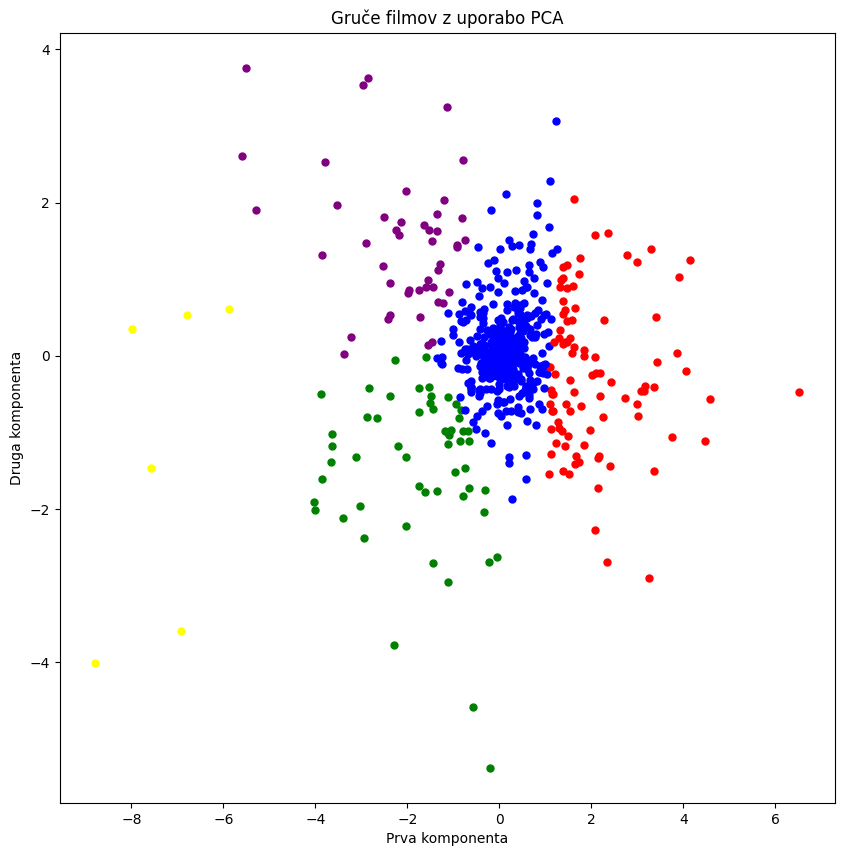

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer

# 1. Izberi 100 najbolj gledanih filmov
movie_counts = ratings.groupby('movieId').size()
top_100_movies = movie_counts.sort_values(ascending=False).head(100).index

# Podatki za 100 najbolj gledanih filmov
ratings_top_100 = ratings[ratings['movieId'].isin(top_100_movies)]

# 2. Ustvarimo matriko uporabnikov-filmov
user_movie_matrix = ratings_top_100.pivot(index='userId', columns='movieId', values='rating')

# 3. Nadomestimo manjkajoče vrednosti
imputer = SimpleImputer(strategy='mean')
user_movie_matrix_filled = pd.DataFrame(imputer.fit_transform(user_movie_matrix), columns=user_movie_matrix.columns)

# 4. Izračunaj podobnost med filmi (uporabimo kosinusno podobnost)
cosine_sim = cosine_similarity(user_movie_matrix_filled.T)

# 5. Gručenje s K-means (izberemo število skupin, npr. 5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(cosine_sim)

# 6. Dodamo oznake skupin filmom
movies_clustered = pd.DataFrame({'movieId': user_movie_matrix.columns, 'cluster': kmeans.labels_})

# 7. Pridobimo naslove filmov za združene skupine
top_100_movies_with_titles = top_100_movies_with_titles.copy()

# Zdaj varno dodeli vrednosti
top_100_movies_with_titles['cluster'] = top_100_movies_with_titles['movieId'].map(movies_clustered.set_index('movieId')['cluster'])

from sklearn.decomposition import PCA

# Zmanjšajmo dimenzionalnost podatkov na 2 komponenti
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(user_movie_matrix_filled)

# Nato izvedemo gručenje na tej zmanjšani dimenzionalnosti
kmeans_reduced = KMeans(n_clusters=5, random_state=42)
kmeans_reduced.fit(reduced_matrix)

# Pridobimo oznake za zmanjšano dimenzijo
reduced_labels = kmeans_reduced.labels_

# Risanje gruč s pomočjo zmanjšane dimenzionalnosti
plt.figure(figsize=(10, 10))
color = {0: "red", 1: "blue", 2: "yellow", 3: "green", 4: "purple"}

for c, x in zip(reduced_labels, reduced_matrix):
    plt.plot(x[0], x[1], ".", color=color[c], markersize=10.0)

plt.xlabel("Prva komponenta")
plt.ylabel("Druga komponenta")
plt.title("Gruče filmov z uporabo PCA")
plt.show()

#### 2.2. vprašanje:

Koliko skupin filmov je med izbranimi? Ali poznamo kvantitativne ocene za različne možnosti razvrščanja v skupine?

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Seznam za shranjevanje rezultatov Silhouette score
silhouette_scores = []

# Preverimo Silhouette score za različna števila klasterjev (n_clusters)
for n_clusters in range(2, 11):  # Preverimo od 2 do 10 klasterjev
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(user_movie_matrix_filled)
    score = silhouette_score(user_movie_matrix_filled, kmeans.labels_)
    silhouette_scores.append(score)

# Izpišemo rezultate
for n_clusters, score in zip(range(2, 11), silhouette_scores):
    print(f"Število klasterjev: {n_clusters}, Silhouette score: {score}")

# Poiščemo optimalno število klasterjev z najvišjim Silhouette score
optimal_n_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimalno število klasterjev je: {optimal_n_clusters}")

Število klasterjev: 2, Silhouette score: 0.07517292905254853
Število klasterjev: 3, Silhouette score: 0.13639673614082934
Število klasterjev: 4, Silhouette score: 0.16775394070644534
Število klasterjev: 5, Silhouette score: 0.1681793952667501
Število klasterjev: 6, Silhouette score: 0.02200322504648458
Število klasterjev: 7, Silhouette score: 0.022384412479340404
Število klasterjev: 8, Silhouette score: 0.13967294596281848
Število klasterjev: 9, Silhouette score: 0.054932647867894015
Število klasterjev: 10, Silhouette score: 0.05301061497213891
Optimalno število klasterjev je: 5


**Odgovor:**

Optimalno število klasterjev bo tisto, za katerega je Silhouette score najbližje 1, kar pomeni, da so klasterji smiselni in dobro ločeni.

Če je Silhouette score nizek ali blizu 0, pomeni, da so klasterji slabo ločeni ali prekrivajoči. 

V zgornjem grafu vidimo da sta najbolj ugodni vrednosti 4 in 5, zato smo kar dobro izbrali z začetno petico.

#### 2.3. vprašanje:

Prikaži rezultate z uporabo ustrezne vizualizacije.

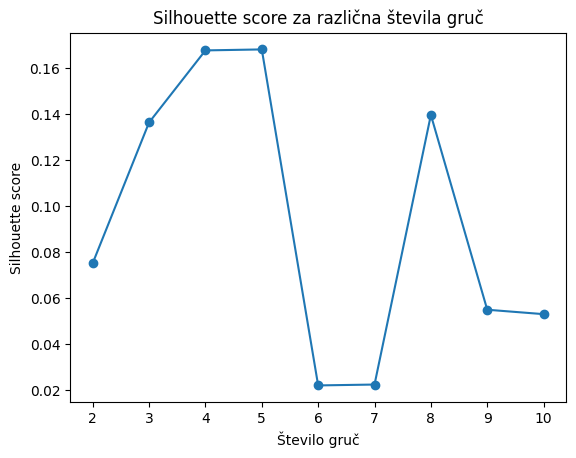

In [ ]:
# Prikazujemo graf za Silhouette score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Število gruč')
plt.ylabel('Silhouette score')
plt.title('Silhouette score za različna števila gruč')
plt.show()

#### 2.4. vprašanje:

Komentiraj smiselnost dobljenih rezultatov.

**Odgovor:**

Najboljši Silhouette score za 5 klasterjev:

- Z največjim Silhouette score (0.168) pri številu klasterjev 5, to pomeni, da so pri tem številu klasterji najjasneje ločeni v primerjavi z drugimi možnostmi.

- Vrednost Silhouette score 0.168 ni zelo visoka, vendar kaže, da so klasterji nekoliko ločeni, vendar ne povsem idealno.

**Zaključek:**

- Na podlagi teh rezultatov lahko rečemo, da je število 5 klasterjev smiselna izbira, ker daje najvišji Silhouette score. Vendar pa ta vrednost ni zelo visoka, kar pomeni, da obstaja precejšnja količina prekrivajočih se skupin, kar bi lahko nakazovalo, da so filmi morda povezani z več različnimi žanri, tematikami ali stilom, zaradi česar je težko jasno ločiti vse skupine.